<a href="https://colab.research.google.com/github/Jon123321s/-/blob/main/ClusteringKR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Mall_Customers_Segmentation.csv') # Загрузка данных из csv-файла
print(df) # Вывод данных
print(list(df.dtypes)) # Вывод типов данных в каждом столбце

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
[dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]


In [ ]:
df["Genre"].value_counts() # Подсчет количества значений в столбце 'genre'

df["Genre"] = df["Genre"].astype('category') # Преобразование типа данных столбца 'genre' к типу 'category'

df["Gender_code"] = df["Genre"].cat.codes # Кодирование столбца 'genre' в виде числовых значений
del df['Genre'] # Удаление столбца 'genre'

#Female is 0; Male is 1;

print(df) # Вывод обновленного датафрейма

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_code
0             1   19                  15                      39            1
1             2   21                  15                      81            1
2             3   20                  16                       6            0
3             4   23                  16                      77            0
4             5   31                  17                      40            0
..          ...  ...                 ...                     ...          ...
195         196   35                 120                      79            0
196         197   45                 126                      28            0
197         198   32                 126                      74            1
198         199   32                 137                      18            1
199         200   30                 137                      83            1

[200 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

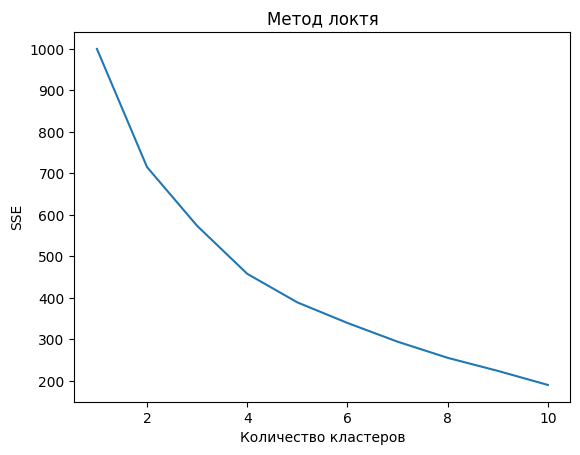

In [ ]:
# Метод локтя масштабирование данных

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
# Применение метода локтя
sse = [] # Реализация метода локтя для определения оптимального количества кластеров
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, max_iter=1000)
  kmeans.fit(data_scaled)
  sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse) # Построение графика зависимости sse от количества кластеров
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('SSE')
plt.show()

In [ ]:
sorted_df = df.sort_values(by='Gender_code', ascending=False) # Сортировка датафрейма по столбцу 'gender_code' в порядке убывания
#print(sorted_df.to_string())  # Вывод отсортированного датафрейма

In [ ]:
df_fem = sorted_df.iloc[88:200, : ] # Выделение данных для женщин и мужчин
df_COOLMANS = sorted_df.iloc[0:88, : ]

#df_COOLMANS.head(10)
print(df_fem) # Вывод данных для женщин

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_code
195         196   35                 120                      79            0
160         161   56                  79                      35            0
159         160   30                  78                      73            0
193         194   38                 113                      91            0
157         158   30                  78                      78            0
..          ...  ...                 ...                     ...          ...
43           44   31                  39                      61            0
44           45   49                  39                      28            0
106         107   66                  63                      50            0
105         106   21                  62                      42            0
100         101   23                  62                      41            0

[112 rows x 5 columns]


<Axes: >

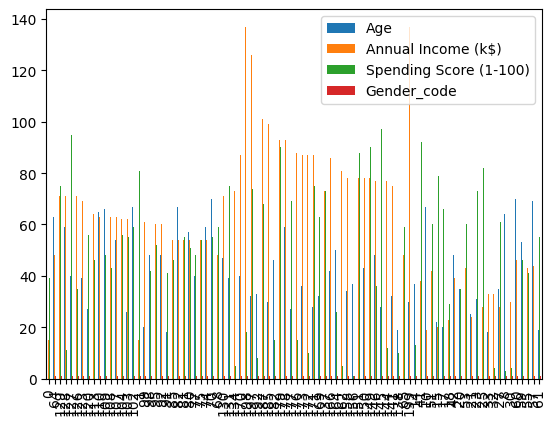

In [ ]:
df_COOLMANS_pre = df_COOLMANS # Предобработка данных для построения графика женщин
del df_COOLMANS_pre['CustomerID']
df_COOLMANS_pre.plot.bar()

<Axes: >

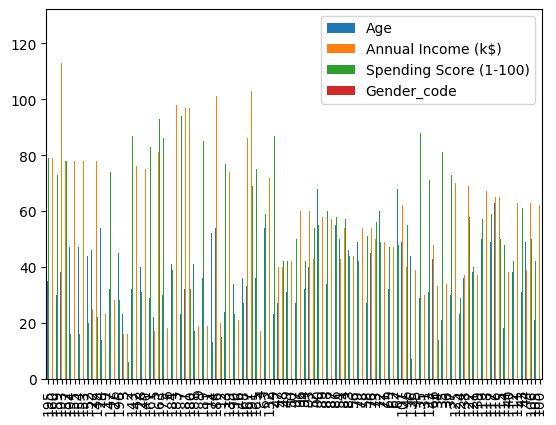

In [ ]:
df_fem_pre = df_fem # Предобработка данных для построения графика мужчин
del df_fem_pre['CustomerID']
df_fem_pre.plot.bar()

<Axes: >

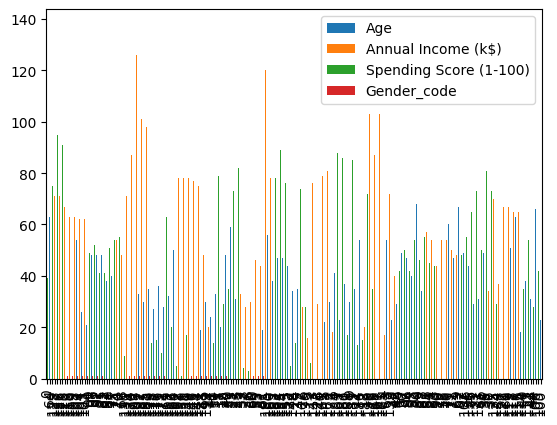

In [ ]:
df_pre = sorted_df # Предобработка данных для построения графика общего количества
del df_pre['CustomerID']
df_pre.plot.bar()

In [ ]:
X = df # Удаление столбцов 'gender_code' и 'customerid'
del X['Gender_code']
del X['CustomerID']

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42) # Кластеризация методом K-means
kmeans.fit(X)

clusters = kmeans.labels_

df['kmeans_cluster'] = kmeans.labels_ # Присвоение кластеров каждому экземпляру

print(f'Кластеры: {len(set(kmeans.labels_))}') # Вывод количества полученных кластеров

Кластеры: 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster1 = df[df['kmeans_cluster'] == 0] # Разделение датафрейма по кластерам
cluster2 = df[df['kmeans_cluster'] == 1]
cluster3 = df[df['kmeans_cluster'] == 2]
cluster4 = df[df['kmeans_cluster'] == 3]
cluster5 = df[df['kmeans_cluster'] == 4]



In [ ]:
print("Кластер 1") # Вывод данных для каждого кластера
print(cluster1)

Кластер 1
    Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
0    19                  15                      39               0
2    20                  16                       6               0
4    31                  17                      40               0
6    35                  18                       6               0
8    64                  19                       3               0
10   67                  19                      14               0
12   58                  20                      15               0
14   37                  20                      13               0
16   35                  21                      35               0
18   52                  23                      29               0
20   35                  24                      35               0
22   46                  25                       5               0
24   54                  28                      14               0
26   45                  28           

In [ ]:
print("Кластер 2") # Вывод данных для каждого кластера
print(cluster2)

Кластер 2
     Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
123   39                  69                      91               1
125   31                  70                      77               1
127   40                  71                      95               1
129   38                  71                      75               1
131   39                  71                      75               1
133   31                  72                      71               1
135   29                  73                      88               1
137   32                  73                      73               1
139   35                  74                      72               1
141   32                  75                      93               1
143   32                  76                      87               1
145   28                  77                      97               1
147   32                  77                      74               1
149   34                

In [ ]:
print("Кластер 3") # Вывод данных для каждого кластера
print(cluster3)

Кластер 3
     Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
124   23                  70                      29               2
128   59                  71                      11               2
130   47                  71                       9               2
132   25                  72                      34               2
134   20                  73                       5               2
136   44                  73                       7               2
138   19                  74                      10               2
140   57                  75                       5               2
142   28                  76                      40               2
144   25                  77                      12               2
146   48                  77                      36               2
148   34                  78                      22               2
150   43                  78                      17               2
152   44                

In [ ]:
print("Кластер 4") # Вывод данных для каждого кластера
print(cluster4)

Кластер 4
     Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
43    31                  39                      61               3
46    50                  40                      55               3
47    27                  40                      47               3
48    29                  40                      42               3
49    31                  40                      42               3
..   ...                 ...                     ...             ...
119   50                  67                      57               3
120   27                  67                      56               3
121   38                  67                      40               3
122   40                  69                      58               3
126   43                  71                      35               3

[79 rows x 4 columns]


In [ ]:
print("Кластер 5") # Вывод данных для каждого кластера
print(cluster5)

Кластер 5
    Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
1    21                  15                      81               4
3    23                  16                      77               4
5    22                  17                      76               4
7    23                  18                      94               4
9    30                  19                      72               4
11   35                  19                      99               4
13   24                  20                      77               4
15   22                  20                      79               4
17   20                  21                      66               4
19   35                  23                      98               4
21   25                  24                      73               4
23   31                  25                      73               4
25   29                  28                      82               4
27   35                  28           

In [ ]:
clus1 = cluster1.describe() # Описание каждого кластера
clus2 = cluster2.describe()
clus3 = cluster3.describe()
clus4 = cluster4.describe()
clus5 = cluster5.describe()

print("Кластер 1") # Вывод описания каждого кластера
print(clus1)
print("Кластер 2")
print(clus2)
print("Кластер 3")
print(clus3)
print("Кластер 4")
print(clus4)
print("Кластер 5")
print(clus5)

Кластер 1
             Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
count  23.000000           23.000000               23.000000            23.0
mean   45.217391           26.304348               20.913043             0.0
std    13.228607            7.893811               13.017167             0.0
min    19.000000           15.000000                3.000000             0.0
25%    35.500000           19.500000                9.500000             0.0
50%    46.000000           25.000000               17.000000             0.0
75%    53.500000           33.000000               33.500000             0.0
max    67.000000           39.000000               40.000000             0.0
Кластер 2
             Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
count  39.000000           39.000000               39.000000            39.0
mean   32.692308           86.538462               82.128205             1.0
std     3.728650           16.312485                9.36

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5) # Иерархическая кластеризация
df['agg_cluster'] = agg_clustering.fit_predict(X)

In [ ]:
kmeans_score = precision_score(X.kmeans_cluster, df['kmeans_cluster'], average = 'macro') # Оценка точности методов кластеризации
agg_score = precision_score(X.agg_cluster, df['agg_cluster'], average = 'macro')

print(f'Средние: {kmeans_score}')        #print(f'Точность K-means: {kmeans_score}')
print(f'Иерархические: {agg_score}')     #print(f'Точность иерархической кластеризации: {agg_score}')

Средние: 1.0
Иерархические: 1.0
